In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [3]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [4]:
#cargamos los datos del proyecto
data = np.load('proyecto_training_data.npy')
print('filas: ',data.shape[0])
print('columnas: ',data.shape[1])
n = len(data)
print(n)

filas:  1460
columnas:  6
1460


In [5]:
df = pd.DataFrame(data,columns=["sale_price","overall_qual","square_feet","total_room","year_build","lot_frontage"])
df.head()

,sale_price,overall_qual,square_feet,total_room,year_build,lot_frontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [326]:
#dividiendo data
n = len(df)
y_train = df[:int(n*0.8)]["sale_price"]/1000
y_test = np.array(df[len(y_train):n]["sale_price"]/1000)
x_train = np.array(df[:int(n*0.8)]["overall_qual"])
x_test = df[len(y_train):n]["overall_qual"]

bias = np.ones(len(x_train)).reshape(len(x_train),1)
#x_train = x_train.reshape(len(x_train),1)
#x_train = np.append(x_train,bias,axis=1)
#x_train = tf.constant(np.float32(x_train),name="x")

In [67]:
#obtenermos los parametros del modelo, inicializados aleatoriamente
def reset():
    tf.reset_default_graph()
    w = tf.get_variable(name="w",dtype=tf.float32,shape=[2,1],
                    initializer=tf.random_normal_initializer(mean=0.0,stddev=0.5))
    return w

In [233]:
#obtenie las predicciones del modelo
def model(x,w):
    return tf.matmul(x,w)

In [9]:
#función de error para el modelo
def error(y,y_hat):
  return 1/2*tf.reduce_mean(tf.math.square(y - y_hat))

In [54]:
#decenso del gradiente
def gradient_decent(tensor_y,y_hat,w):
    return tf.gradients(error(tensor_y,y_hat),[w])

In [306]:
def training(X,Y,epochs,lr,w):
    y_hat = tf.matmul(X,w)
    get_gradient = gradient_decent(Y,y_hat,w)
    print(get_gradient)
    wa = tf.assign(w, w - lr*get_gradient)
    err = error(Y,y_hat)
    with tf.train.MonitoredSession() as session:
        feed_dict = {X:x_train, Y:y_train}
        for i in range(epochs):
            session.run(get_gradient,feed_dict=feed_dict)
            session.run(wa,feed_dict=feed_dict)

            if(i+1)%print_each == 0:
                print("Gradiente del error respecto de m y b en iteración:",i+1)
                print("m:",session.run(m),"b:",session.run(b))
                print("    error: ",session.run(err,feed_dict))
                print("=======================================")
        

ValueError: Shapes must be equal rank, but are 2 and 3 for '{{node Assign_2}} = Assign[T=DT_FLOAT, use_locking=true, validate_shape=true](w, sub_4)' with input shapes: [2,1], [1,2,1].

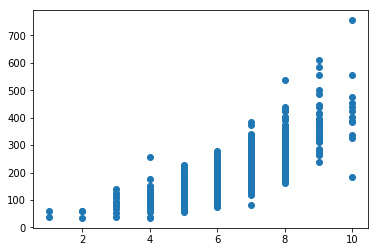

In [366]:
plt.scatter(x_train,y_train)

tf.reset_default_graph()

learning_rate = 0.009

m = tf.get_variable("pendiente",dtype=tf.float32, shape=[],
                    initializer=tf.zeros_initializer())
b = tf.get_variable("intercepto",dtype=tf.float32, shape=[],
                    initializer=tf.zeros_initializer())

bias = np.ones(len(x_train)).reshape(len(x_train),1)
x1 = x_train.reshape(len(x_train),1)
x1 = np.append(x1,bias,axis=1)
x1 = tf.constant(np.float32(x1),name="x1")

w = tf.get_variable(name="w",dtype=tf.float32,shape=[2,1],
                    initializer=tf.random_normal_initializer(mean=0.0,stddev=0.5))

tensor_x = tf.placeholder(tf.float32,[len(y_train)],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[len(y_train)],"tensor_y")

prediccion = tf.add(tf.multiply(m,x_train),b)
pred = tf.transpose(tf.matmul(x1,w))

gradiente = tf.gradients(error(tensor_y,prediccion) ,[m,b] )

grad2 = tf.gradients(error(tensor_y,pred) ,[w] )

actualizacion_m = tf.assign(m, m - learning_rate*gradiente[0] )
actualizacion_b = tf.assign(b, b - learning_rate*gradiente[1] )
actualizacion_parametros = tf.group(actualizacion_m,actualizacion_b)
aw = tf.assign(w)

with tf.train.MonitoredSession() as session:
  feed_dict = {tensor_x:x_train, tensor_y:y_train}

  for i in range(5):
    print("Gradiente del error respecto de m y b:")
    print(session.run(gradiente,feed_dict=feed_dict))

    session.run(actualizacion_parametros,feed_dict=feed_dict)

    predicciones = session.run(prediccion,feed_dict=feed_dict)
    print(predicciones)
    print(session.run(pred))
    print(session.run(grad2,feed_dict))
    plt.plot(x_train,predicciones,label=str(i))

plt.legend()
plt.show()

In [309]:
lr = 0.009
w = reset()

tensor_x = tf.placeholder(tf.float32,[None,None],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[None,None],"tensor_x")

#print(x_train)

#training(tensor_x,tensor_y,15000,lr,w)